In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#from keras.optimizers import adam_v2
from keras.optimizers import Adam
import pandas as pd
import numpy as np
import glob
import cv2
import os
import locale
import tensorflow as tf
from datetime import datetime
import tensorboard
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
df = pd.read_excel("Anode.xlsx")

In [ ]:
df.head(3)

,Al,Zn,In,Mg,Ti,La,Sn,Cd,Si,Cu,...,DO(mg/L),Temprature,Pressure(atm),Ref.Electrode,Cat.Electrode,Current density,Ratio,Microstructure,OCP(SCE),Efficiency(%)
0,94.80,5.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,...,Good,303,1,SCE,Mild steel,NaN,10.0,NaN,-1.025,71.4
1,94.79,5.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,...,Good,303,1,SCE,Mild steel,NaN,10.0,NaN,-1.022,73.4
2,94.75,5.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,...,Good,303,1,SCE,Mild steel,NaN,10.0,NaN,-1.050,79.8


In [ ]:
df.shape

(124, 27)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Al               124 non-null    float64
 1   Zn               124 non-null    float64
 2   In               124 non-null    float64
 3   Mg               124 non-null    float64
 4   Ti               124 non-null    float64
 5   La               124 non-null    float64
 6   Sn               124 non-null    float64
 7   Cd               124 non-null    float64
 8   Si               124 non-null    float64
 9   Cu               124 non-null    float64
 10  Fe               124 non-null    float64
 11  Mn               124 non-null    float64
 12  Ga               124 non-null    float64
 13  Bi               124 non-null    float64
 14  Se               124 non-null    float64
 15  Be               124 non-null    int64  
 16  PH               102 non-null    float64
 17  DO(mg/L)        

In [ ]:
df.drop(columns=['Microstructure','OCP(SCE)','Ref.Electrode'],inplace=True)

In [ ]:
values = {"PH": 8.2, "Current density": 1, "Ratio": 60}
df.fillna(value=values ,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Al               124 non-null    float64
 1   Zn               124 non-null    float64
 2   In               124 non-null    float64
 3   Mg               124 non-null    float64
 4   Ti               124 non-null    float64
 5   La               124 non-null    float64
 6   Sn               124 non-null    float64
 7   Cd               124 non-null    float64
 8   Si               124 non-null    float64
 9   Cu               124 non-null    float64
 10  Fe               124 non-null    float64
 11  Mn               124 non-null    float64
 12  Ga               124 non-null    float64
 13  Bi               124 non-null    float64
 14  Se               124 non-null    float64
 15  Be               124 non-null    int64  
 16  PH               124 non-null    float64
 17  DO(mg/L)        

<ipython-input-10-f0e0163f5d75>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  my_correlation = df.corr()


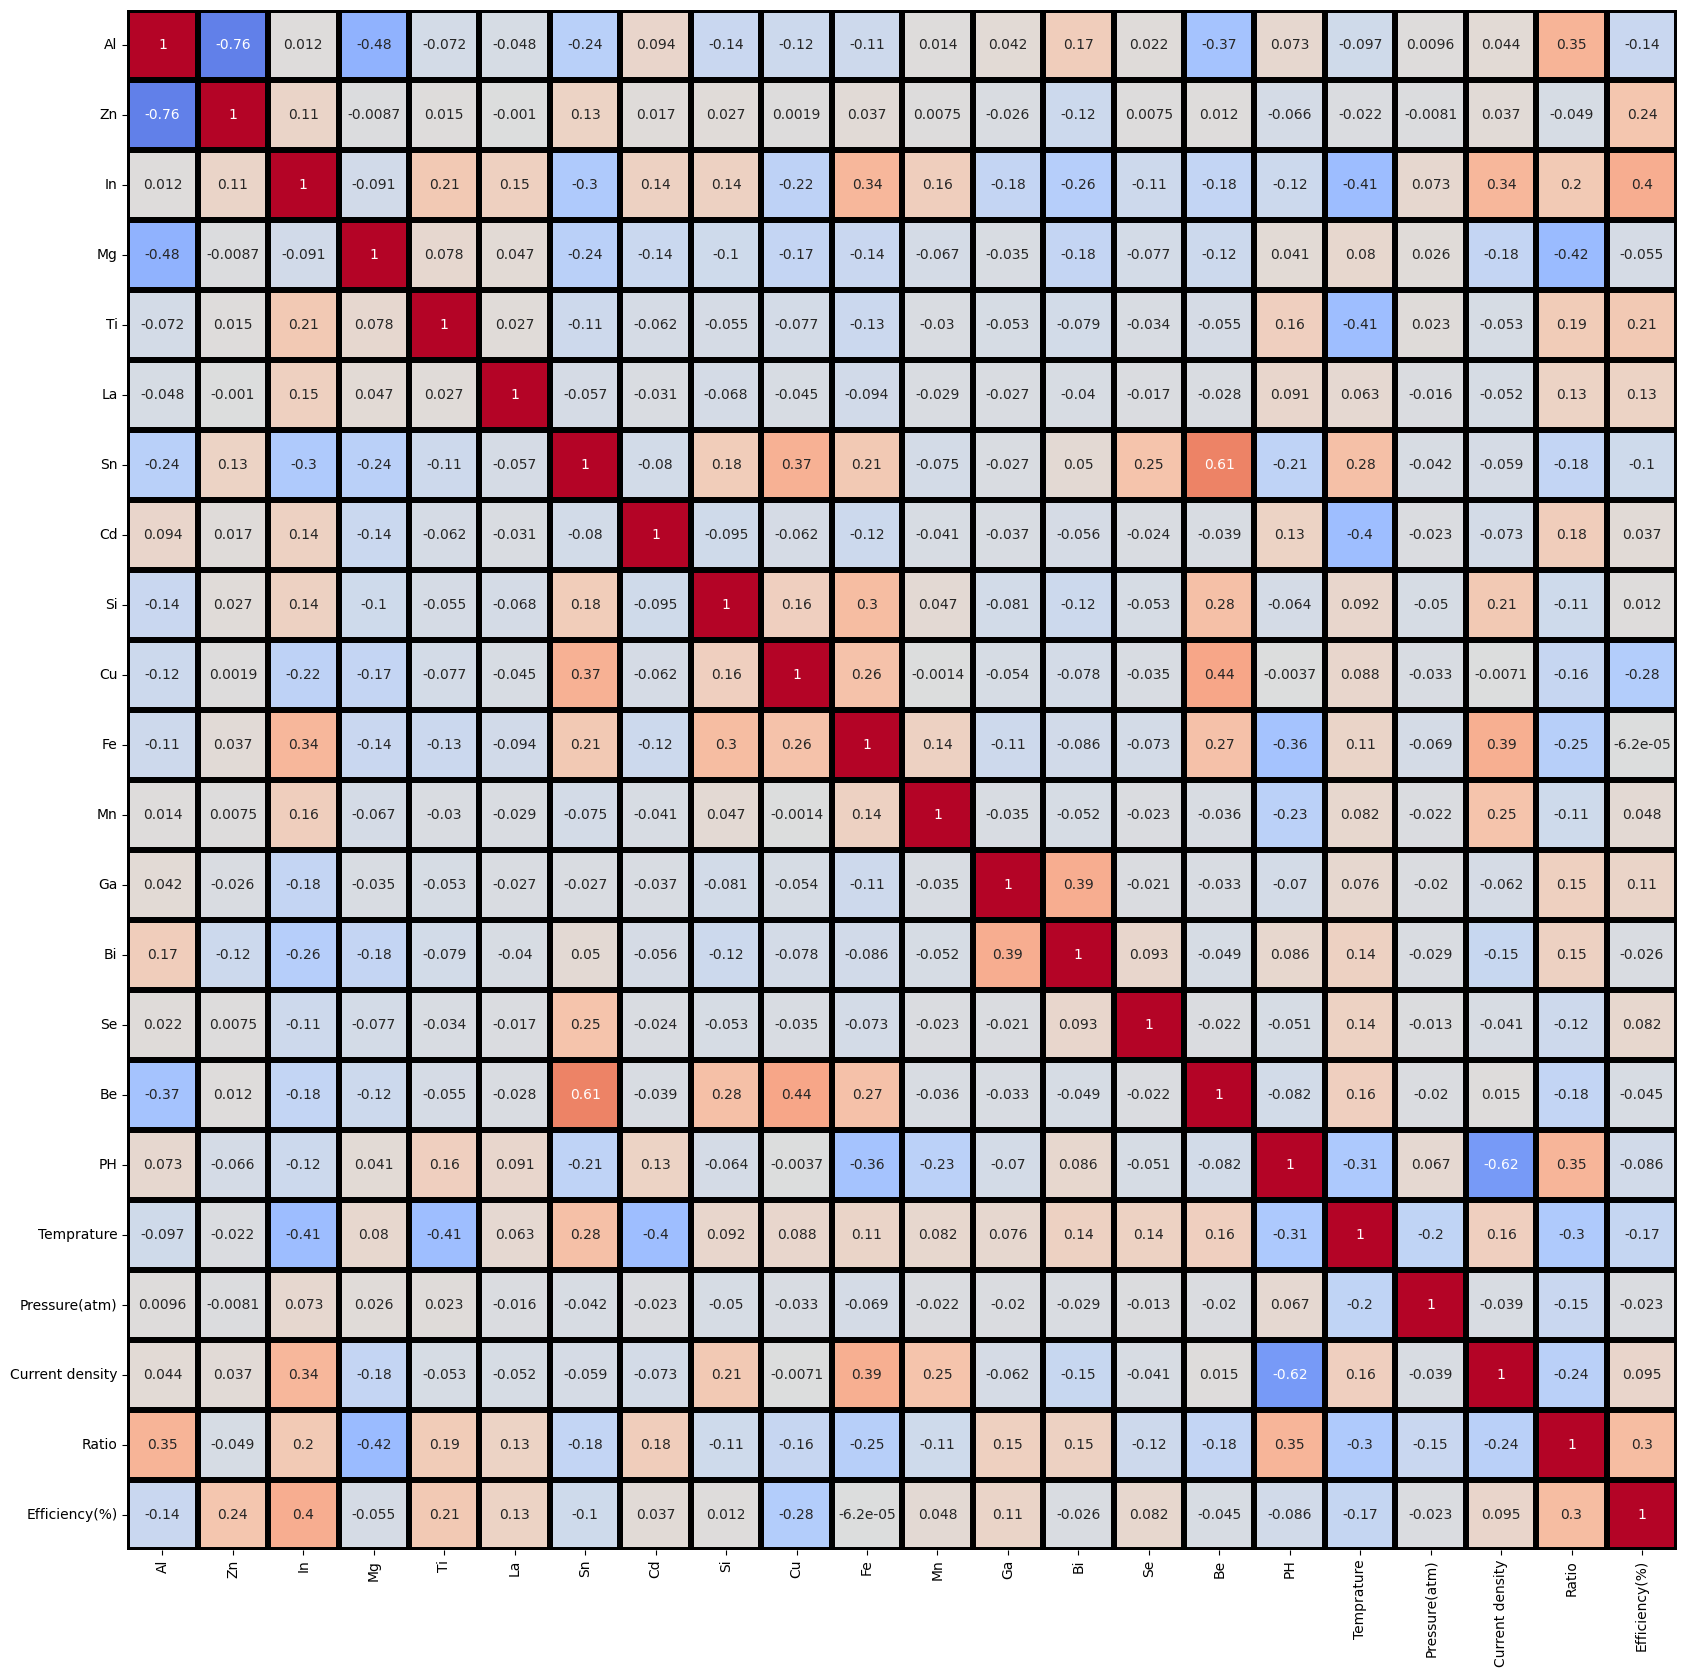

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
my_correlation = df.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(my_correlation, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black',cbar=False , ax=ax);

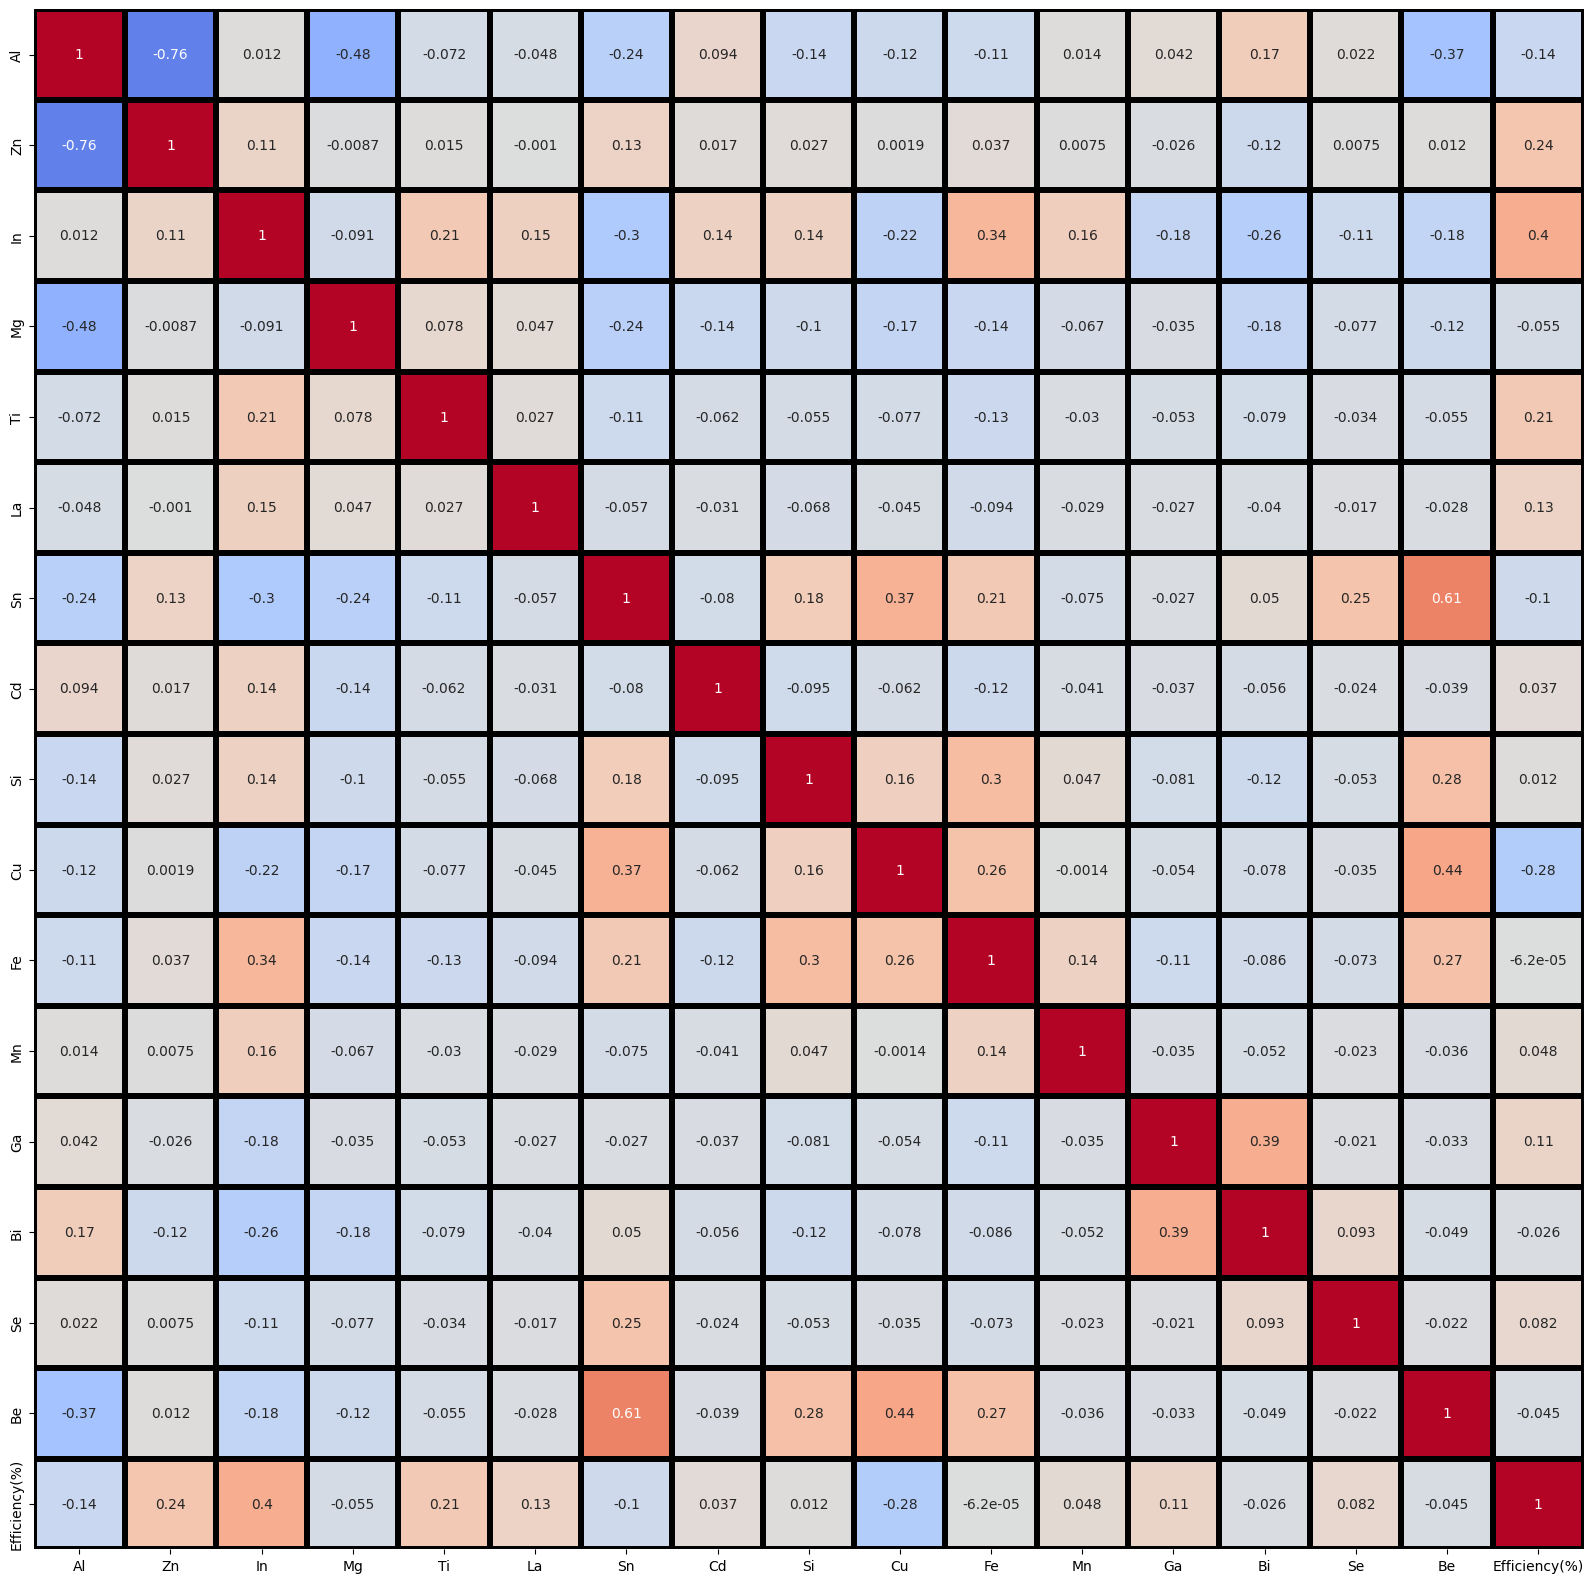

In [ ]:
df_chemical_composition=df.drop(columns=['Ratio','Current density','Pressure(atm)','Temprature','PH','DO(mg/L)','Cat.Electrode'])
my_correlation = df_chemical_composition.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(my_correlation, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black',cbar=False , ax=ax );

In [ ]:
df_remaining_features=df.drop(columns=['Al','Zn','In','Mg','Ti','Sn','Cd','Si','Cu','Fe','Mn','Ga','Bi','Se','Be','La'])

<ipython-input-13-1e8ef383873e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  my_correlation = df_remaining_features.corr()


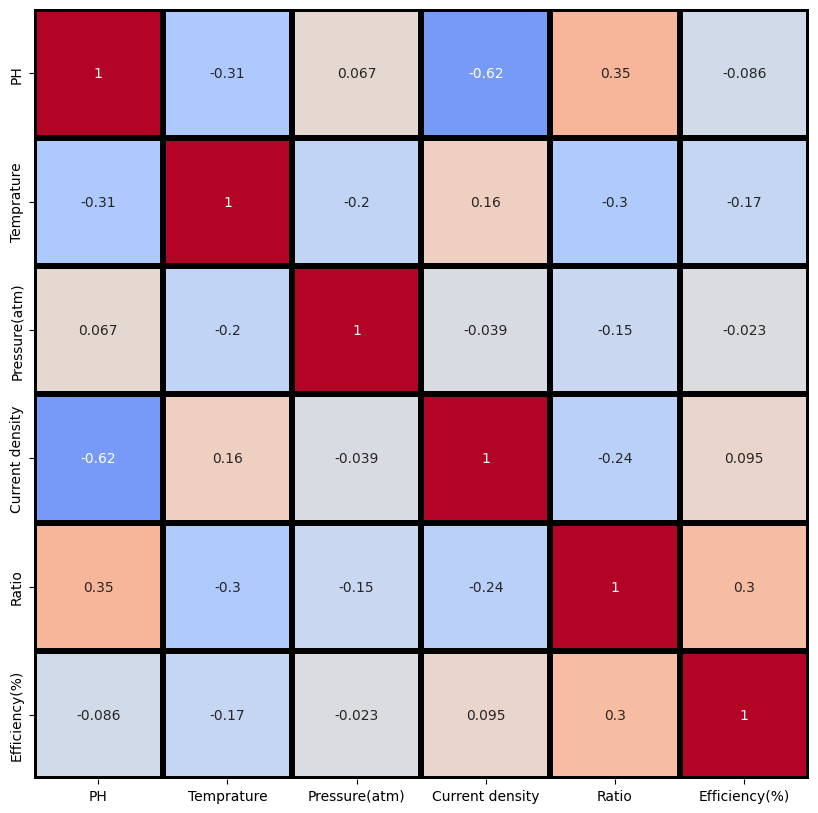

In [ ]:
my_correlation = df_remaining_features.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(my_correlation, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black',cbar=False , ax=ax);

In [ ]:
(train, test) = train_test_split(df, test_size=0.10, random_state=42)
print(train.shape)
print(test.shape)

(111, 24)
(13, 24)


In [ ]:
max_efficiency = train["Efficiency(%)"].max()
trainY = train["Efficiency(%)"]/max_efficiency
testY = test["Efficiency(%)"] /max_efficiency

In [ ]:
continuous = ["Al", "Zn", "In",'Mg','Ti','La','Sn','Cd','Si','Cu','Fe','Mn','Ga','Bi','Se','Be','La','PH','Temprature','Current density']

In [ ]:
cs = MinMaxScaler()
trainContinuous = cs.fit_transform(train[continuous])
testContinuous = cs.transform(test[continuous])

In [ ]:
zipBinarizer = LabelBinarizer().fit(df["DO(mg/L)"])
trainCategorical_1 = zipBinarizer.transform(train["DO(mg/L)"])
testCategorical_1 = zipBinarizer.transform(test['DO(mg/L)'])

In [ ]:
zipBinarizer = LabelBinarizer().fit(df['Cat.Electrode'])
trainCategorical_2 = zipBinarizer.transform(train['Cat.Electrode'])
testCategorical_2 = zipBinarizer.transform(test['Cat.Electrode'])

In [ ]:
trainX = np.hstack([trainCategorical_1,trainCategorical_2, trainContinuous])
testX = np.hstack([testCategorical_1,testCategorical_2, testContinuous])

print(trainX.shape)
print(testX.shape)

(111, 28)
(13, 28)


In [ ]:
%load_ext tensorboard

In [ ]:
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
totality=[]
for j in range(100):
  loss_collection=[]
  validation_loss_collection=[]
  for i in (range(11)):
    dim = trainX.shape[1]
    #define our MLP network
    model = Sequential()
    model.add(Dense(28, input_dim=dim, activation="relu"))
    model.add(Dense(i, activation="relu"))
    model.add(Dense(1, activation="linear"))
    opt = Adam(lr=1e-3, decay=1e-3 / 200)
    model.compile(loss="mean_absolute_percentage_error", optimizer=opt)
    history=model.fit(trainX, trainY, validation_data=(testX, testY),
                      epochs=30, batch_size=5,
                      callbacks=[tensorboard_callback])
    #appending loss value of last epoch in each neuron number
    loss_value=history.history['loss']
    loss_collection.append(loss_value[29])
    validation_loss_value=history.history['val_loss']
    validation_loss_collection.append(validation_loss_value[29])
    print('-----------It was',i,'th neurons in',j+1,'round-----------')
  print('-----------the',j+1,'finished-----------')
  #appending the number of neurons with lowest loss value
  totality.append(pd.Series(validation_loss_collection).idxmin())

Streaming output truncated to the last 5000 lines.
Epoch 6/30
23/23 [==============================] - 0s 7ms/step - loss: 15.5958 - val_loss: 19.4666
Epoch 7/30
23/23 [==============================] - 0s 6ms/step - loss: 14.3428 - val_loss: 18.6123
Epoch 8/30
23/23 [==============================] - 0s 7ms/step - loss: 12.1317 - val_loss: 14.4215
Epoch 9/30
23/23 [==============================] - 0s 7ms/step - loss: 11.3306 - val_loss: 13.4768
Epoch 10/30
23/23 [==============================] - 0s 6ms/step - loss: 10.2631 - val_loss: 12.9746
Epoch 11/30
23/23 [==============================] - 0s 5ms/step - loss: 9.5195 - val_loss: 12.7361
Epoch 12/30
23/23 [==============================] - 0s 6ms/step - loss: 9.2812 - val_loss: 13.0695
Epoch 13/30
23/23 [==============================] - 0s 6ms/step - loss: 8.8761 - val_loss: 12.5050
Epoch 14/30
23/23 [==============================] - 0s 6ms/step - loss: 8.5865 - val_loss: 12.3644
Epoch 15/30
23/23 [=============================

In [ ]:
 print(totality)

[9, 2, 6, 9, 3, 8, 8, 5, 6, 7, 3, 6, 5, 8, 4, 8, 2, 7, 5, 10, 7, 8, 3, 10, 2, 7, 8, 4, 4, 2, 6, 6, 5, 9, 3, 7, 9, 9, 8, 9, 5, 7, 4, 10, 9, 4, 9, 2, 9, 9, 6, 5, 10, 4, 4, 10, 8, 4, 3, 2, 5, 2, 8, 10, 10, 8, 9, 9, 10, 5, 2, 7, 7, 8, 3, 3, 8, 8, 10, 3, 8, 9, 10, 6, 4, 4, 4, 4, 6, 8, 9, 5, 8, 6, 9, 5, 2, 5, 1, 8]


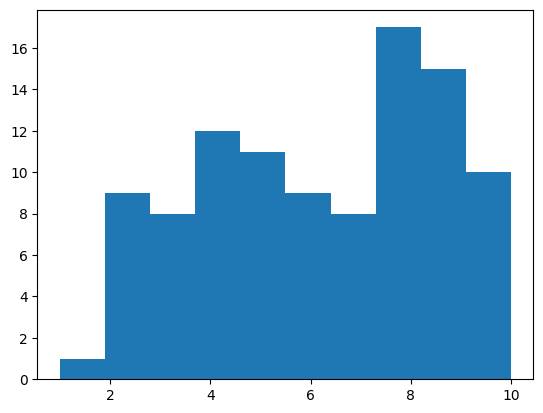

In [ ]:
fig , ax = plt.subplots()
bins = ax.hist(totality);

In [ ]:
totality=[9, 2, 6, 9, 3, 8, 8, 5, 6, 7, 3, 6, 5, 8, 4, 8, 2, 7, 5, 10, 7, 8, 3, 10, 2, 7, 8, 4, 4, 2, 6, 6, 5, 9, 3, 7, 9, 9, 8, 9, 5, 7, 4, 10, 9, 4, 9, 2, 9, 9, 6, 5, 10, 4, 4, 10, 8, 4, 3, 2, 5, 2, 8, 10, 10, 8, 9, 9, 10, 5, 2, 7, 7, 8, 3, 3, 8, 8, 10, 3, 8, 9, 10, 6, 4, 4, 4, 4, 6, 8, 9, 5, 8, 6, 9, 5, 2, 5, 1, 8]

In [ ]:
print(totality.count(0))
print(totality.count(1))
print(totality.count(2))
print(totality.count(3))
print(totality.count(4))
print(totality.count(5))
print(totality.count(6))
print(totality.count(7))
print(totality.count(8))
print(totality.count(9))
print(totality.count(10))

0
1
9
8
12
11
9
8
17
15
10


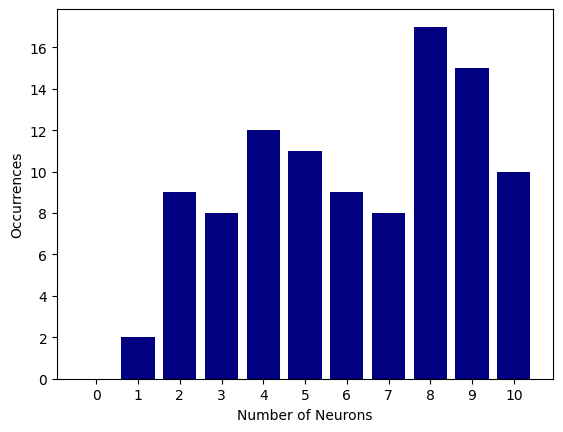

In [ ]:
lis=[0,2,9,8,12,11,9,8,17,15,10]
tio=[0,1,2,3,4,5,6,7,8,9,10]
plt.bar(tio,lis,color='navy')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.xlabel('Number of Neurons')
plt.ylabel('Occurrences');

In [ ]:
dimension = trainX.shape[1]
# define our MLP network
Ann_model_optimized = Sequential()
Ann_model_optimized.add(Dense(28, input_dim=dimension, activation="relu"))
Ann_model_optimized.add(Dense(8, activation="relu"))
Ann_model_optimized.add(Dense(1, activation="linear"))

In [ ]:
%load_ext tensorboard
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
opt = Adam(lr=1e-3, decay=1e-3 / 200)
Ann_model_optimized.compile(loss="mean_absolute_percentage_error", optimizer=opt)

In [ ]:
history_optimized=Ann_model_optimized.fit(trainX, trainY, validation_data=(testX, testY),
    epochs=30, batch_size=5,callbacks=[tensorboard_callback])

Epoch 1/30
23/23 [==============================] - 1s 11ms/step - loss: 41.2868 - val_loss: 25.7581
Epoch 2/30
23/23 [==============================] - 0s 5ms/step - loss: 19.3090 - val_loss: 18.0291
Epoch 3/30
23/23 [==============================] - 0s 4ms/step - loss: 14.6483 - val_loss: 15.6720
Epoch 4/30
23/23 [==============================] - 0s 4ms/step - loss: 12.5103 - val_loss: 14.4784
Epoch 5/30
23/23 [==============================] - 0s 4ms/step - loss: 10.7316 - val_loss: 11.5287
Epoch 6/30
23/23 [==============================] - 0s 4ms/step - loss: 9.4627 - val_loss: 9.5006
Epoch 7/30
23/23 [==============================] - 0s 4ms/step - loss: 8.6316 - val_loss: 10.3694
Epoch 8/30
23/23 [==============================] - 0s 5ms/step - loss: 8.7471 - val_loss: 10.7255
Epoch 9/30
23/23 [==============================] - 0s 4ms/step - loss: 8.8159 - val_loss: 10.9801
Epoch 10/30
23/23 [==============================] - 0s 4ms/step - loss: 7.7779 - val_loss: 10.3156
Epoc

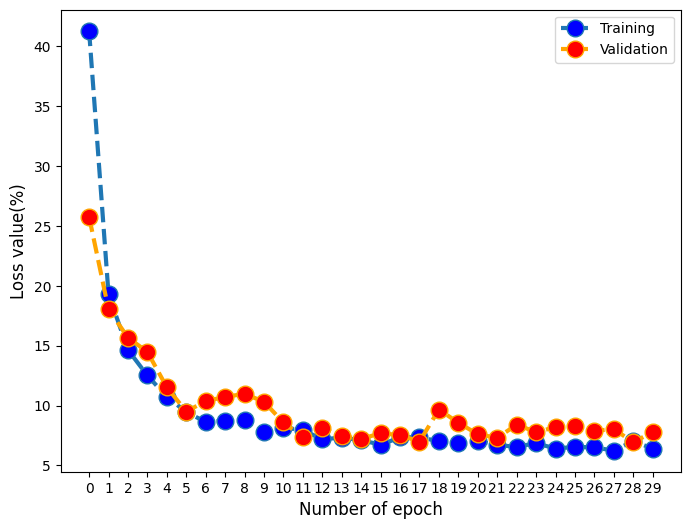

In [ ]:
plt.subplots(figsize=(8,6))
plt.plot(history_optimized.history['loss'],label='Training', marker='o', linestyle='dashed', markerfacecolor='blue', markersize=12, linewidth=3)
plt.plot(history_optimized.history['val_loss'],label='Validation',color='orange', marker='o', linestyle='dashed', markerfacecolor='red', markersize=12, linewidth=3)
plt.xticks(np.arange(0, 30, 1.0))
plt.xlabel('Number of epoch',size=12)
plt.ylabel('Loss value(%)',size=12)
plt.legend();

In [ ]:
preds = Ann_model_optimized.predict(testX)

1/1 [==============================] - 0s 115ms/step


In [ ]:
print('prediction values:',preds*max_efficiency)

prediction values: [[87.203514]
 [90.73535 ]
 [86.1938  ]
 [64.90307 ]
 [76.65256 ]
 [73.48225 ]
 [75.88863 ]
 [92.48864 ]
 [92.51843 ]
 [99.13988 ]
 [70.19335 ]
 [79.89324 ]
 [87.931   ]]


In [ ]:
print('Actual values:',testY*max_efficiency)

Actual values: 18     84.33
42     87.88
36     90.54
76     68.00
53     61.98
90     78.63
56     82.00
122    87.65
121    90.74
4      90.00
27     88.00
101    78.60
44     95.84
Name: Efficiency(%), dtype: float64


In [ ]:
print('mean_absolute_percentage_error:',mean_absolute_percentage_error(testY,preds)*100)

mean_absolute_percentage_error: 7.804013570426499


In [ ]:
print('mean_absolute_error:',mean_absolute_error(testY,preds)*100)

mean_absolute_error: 6.409825820795921


In [ ]:
print('root_mean_absolute_error:',(mean_absolute_percentage_error(testY,preds)*100)**0.5)

root_mean_absolute_error: 2.7935664607140636


In [ ]:
print(Ann_model_optimized.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 28)                812       
                                                                 
 dense_4 (Dense)             (None, 8)                 232       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,053
Trainable params: 1,053
Non-trainable params: 0
_________________________________________________________________
None
